# 19.2.2 Build a Basic Neural Network

## Import our dependencies

In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

## Generate dummy dataset

In [2]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

## Creating a DataFrame with the dummy data

In [3]:
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

## Plotting the dummy data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

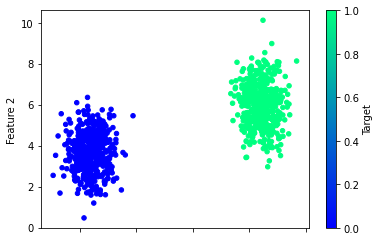

In [4]:
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

## Use sklearn to split dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Create scaler instance

In [6]:
X_scaler = skl.preprocessing.StandardScaler()

## Fit the scaler

In [7]:
X_scaler.fit(X_train)

StandardScaler()

# Scale the data

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model

In [9]:
nn_model = tf.keras.models.Sequential()

## Add our first Dense layer, including the input layer

In [10]:
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

## Add the output layer that uses a probability activation function

In [11]:
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

## Check the structure of the Sequential model

In [12]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 19.2.3 Train and Test a Basic Neural Network

## Fit the model to the training data

In [21]:
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.4493 - accuracy: 0.9733
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.9947
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.9947
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.9947
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.9947
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.9947
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3858 - accuracy: 0.9947
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.9960
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.9960
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3582 - accuracy: 0.9960
Epoch 11/

## Create a DataFrame containing training history

In [22]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

## Plot the loss

<AxesSubplot:>

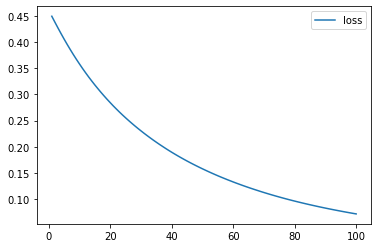

In [23]:
history_df.plot(y="loss")

## Plot the accuracy

<AxesSubplot:>

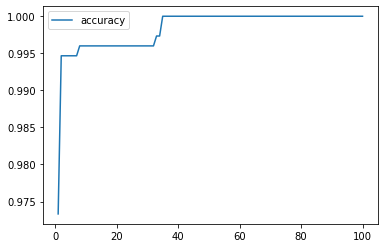

In [24]:
history_df.plot(y="accuracy")

## Evaluate the model using the test data

In [25]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0741 - accuracy: 1.0000 - 164ms/epoch - 21ms/step
Loss: 0.07405970245599747, Accuracy: 1.0


## Predict the classification of a new set of blob data

In [26]:
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## Predict the classification of a new set of blob data

In [27]:
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

# 19.2.4 Nuances of Neural Networks on Nonlinear Numbers

In [28]:
from sklearn.datasets import make_moons

## Creating dummy nonlinear data

In [29]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

## Transforming y_moons to a vertical vector

In [30]:
y_moons = y_moons.reshape(-1, 1)

## Creating a DataFrame to plot the nonlinear dummy data

In [31]:
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

## Plot the nonlinear dummy data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

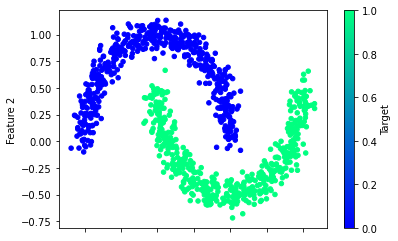

In [32]:
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

## Create training and testing sets

In [33]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

## Create the scaler instance

In [34]:
X_moon_scaler = skl.preprocessing.StandardScaler()

## Fit the scaler

In [35]:
X_moon_scaler.fit(X_moon_train)

StandardScaler()

## Scale the data

In [36]:
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

## Training the model with the nonlinear data

In [37]:
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2023 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0637 - accuracy: 0.4867
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9729 - accuracy: 0.5013
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9117 - accuracy: 0.5160
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8671 - accuracy: 0.5267
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8319 - accuracy: 0.5360
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8031 - accuracy: 0.5533
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7788 - accuracy: 0.5667
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7581 - accuracy: 0.5773
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7400 - accuracy: 0.5813
Epoch 11/

## Create a DataFrame containing training history

In [38]:
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

## Plot the loss

<AxesSubplot:>

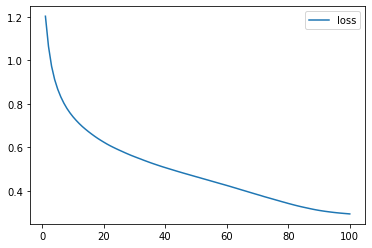

In [39]:
history_df.plot(y="loss")

## Plot the loss

<AxesSubplot:>

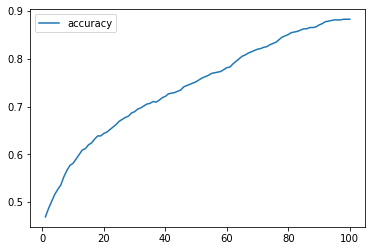

In [40]:
history_df.plot(y="accuracy")

# 19.2.5 Create the Connective Tissue, the Multiple-Neuron Neural Network

## Generate our new Sequential model

In [41]:
new_model = tf.keras.models.Sequential()

## Add the input and hidden layer

In [42]:
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

## Add the output layer that uses a probability activation function

In [43]:
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

## Compile the Sequential model together and customize metrics

In [44]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Fit the model to the training data

In [45]:
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.5133
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.5800
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.6440
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7133
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.8080
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8373
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.8467
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.8507
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8520
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8520
Epoch 11/

# 19.2.6 Give Your Model a Synaptic Boost

## skipped 2 skill drills